## Estadistica Aplicada

Francisco Humberto Villegas Reyna 1731722 grupo043


In [1]:
#librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##tamano de grafica(largo, alto)
plt.rcParams['figure.figsize']=(10,6)

In [5]:
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

<Axes: xlabel='Month'>

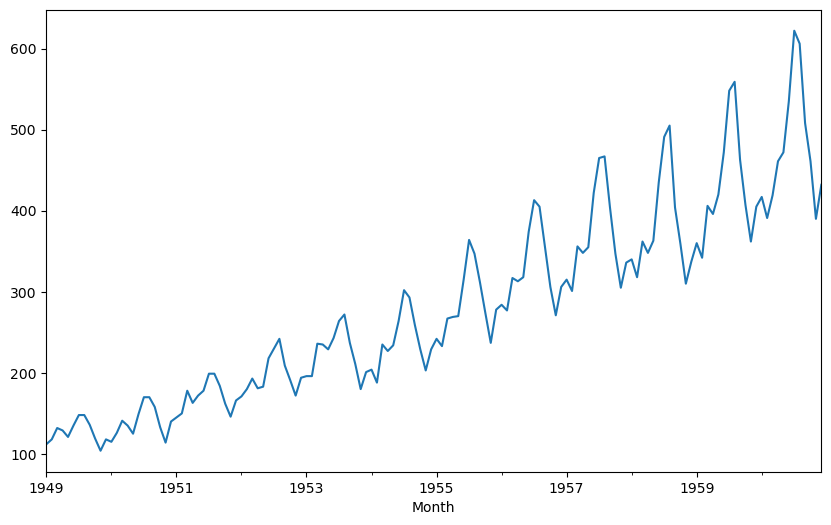

In [6]:
## comenzamos graficando
pasajeros['Thousands of Passengers'].plot();

In [7]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
## promedio movil simple a 12 meses
## PMS-12

pasajeros['PMS-12']=pasajeros['Thousands of Passengers'].rolling(12).mean()

In [10]:
pasajeros.head(13)

,Thousands of Passengers,PMS-12
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


In [12]:
pasajeros['PMC-11']=pasajeros['Thousands of Passengers'].rolling(11,center=True).mean()

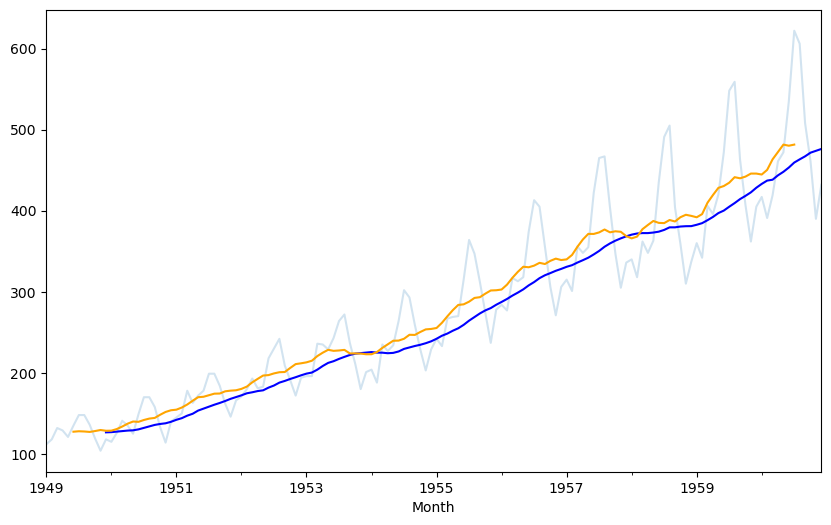

In [24]:
##transparencia alpha 1 no transparente , 0 transparente
pasajeros['Thousands of Passengers'].plot(alpha=0.2)
pasajeros['PMS-12'].plot(color='blue')
pasajeros['PMC-11'].plot(color='orange');

In [25]:
## importar
import yfinance as yf

In [26]:
amazon=yf.download('AMZN', start='2016-01-01', end='2022-12-31', progress=False)

In [27]:
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000


In [28]:
amazon=amazon[['Adj Close']]

In [29]:
## señal de corto plazo
amazon['PMS-10']=amazon['Adj Close'].rolling(10).mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23580\251448293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['PMS-10']=amazon['Adj Close'].rolling(10).mean()


In [30]:
## señal de largo plazo
amazon['PMS-50']=amazon['Adj Close'].rolling(50).mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23580\2630712712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['PMS-50']=amazon['Adj Close'].rolling(50).mean()


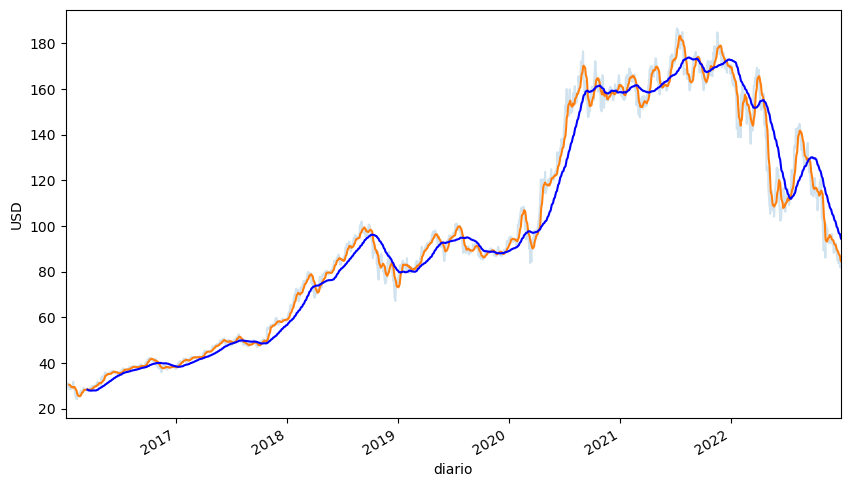

In [40]:
amazon['Adj Close'].plot(alpha=0.2)
amazon['PMS-10'].plot()
amazon['PMS-50'].plot(color='blue')
plt.ylabel('USD')
plt.xlabel('diario')
plt.xlim('2016-01-04','2022-12-30');

Retorno $\frac{P_t - P_{t-1}}{P_{t-1}}$

In [42]:
### .pct_change()
amazon['retorno']=amazon['Adj Close'].pct_change()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23580\738811160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['retorno']=amazon['Adj Close'].pct_change()


In [43]:
amazon.head()

,Adj Close,PMS-10,PMS-50,retorno
Date,,,,
2016-01-04,31.849501,NaN,NaN,NaN
2016-01-05,31.689501,NaN,NaN,-0.005024
2016-01-06,31.632500,NaN,NaN,-0.001799
2016-01-07,30.396999,NaN,NaN,-0.039058
2016-01-08,30.352501,NaN,NaN,-0.001464


<Axes: xlabel='Date'>

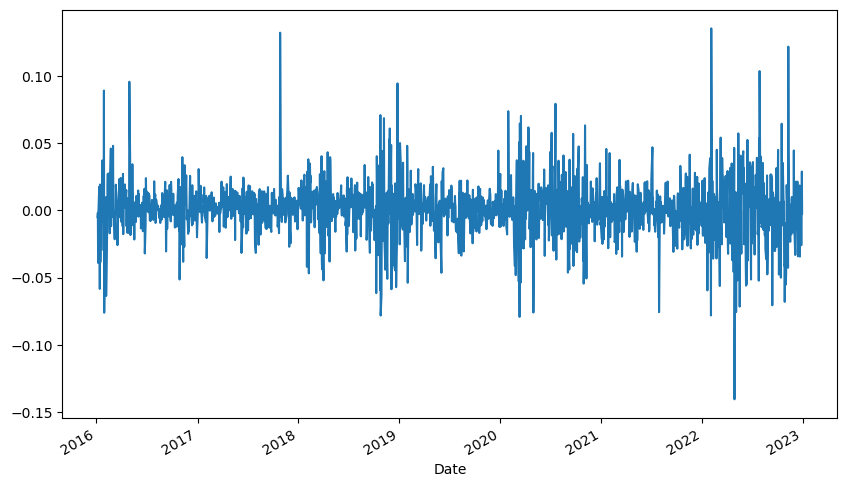

In [44]:
amazon['retorno'].plot()